In [5]:
from sklearn import datasets

In [6]:
import numpy as np
import scipy.stats as ss
import random
import matplotlib.pyplot as plt

In [7]:
def generate_synth_data(n=50):
    """Generating Synthetic Data , default value is 50"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))) , axis = 0 )
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [8]:
def distance(p1,p2):
    """Find the distance between two point"""
    dist = np.sqrt(np.sum(np.power(p2 - p1 , 2)))
    return dist

def majority_vote(votes):
    """ Return the most common element in votes traditional method"""
    vote_counts ={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max(vote_counts.values())
    for vote , count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)

def find_nearest_neighbors(p , points , k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p,points,outcomes ,k=5):
    ind = find_nearest_neighbors(p,points,k)
    return majority_vote(outcomes[ind])

In [9]:
def make_prediction_grid(predictors , outcomes ,limits ,h,k):
    """Classify each point on the prediction grid."""
    (x_min,x_max,y_min,y_max)= limits
    xs = np.arange(x_min,x_max,h)
    yx = np.arange(y_min,y_max,h)
    xx , yy = np.meshgrid(xs,yx)

    prediction_grid = np.zeros(xx.shape , dtype =int)
    for i,x in enumerate(xs):
        for j,y in enumerate(yx):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p,predictors,outcomes,k)
    return (xx,yy,prediction_grid)

In [10]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [11]:
iris = datasets.load_iris()

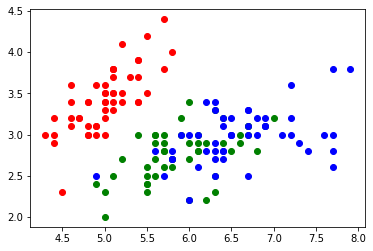

In [13]:
predictors = iris.data[:,0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0] , predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0] , predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0] , predictors[outcomes==2][:,1],"bo")

In [16]:
k=5
filename = "iris_grid_02.pdf"
limits = (4,8,1.5,4)
h = 0.1 #step size

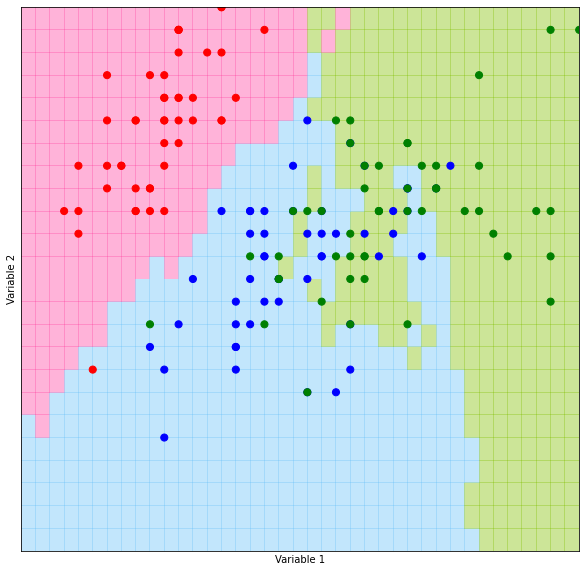

In [17]:
(xx ,yy, prediction_grid)= make_prediction_grid(predictors , outcomes, limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [20]:
sk_predictions.shape

(150,)